# Dashboard

Cells in this notebook are set to slide using RISE extension.

In [1]:
# !pip install wordcloud
# !pip install --upgrade pillow

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
irelandNewsDF = pd.read_csv('datasets/ie_news_cleaned.csv')
ukNewsDF = pd.read_csv('datasets/uk_news_cleaned.csv')

## Ireland News Dataset

In [4]:
irelandNewsGroupedByMonth = irelandNewsDF.groupby(["month", "sentiment_label"]).agg(
    mean_value=("sentiment", "mean"),
    count=("sentiment", "count"),
)
irelandNewsGroupedByMonth.reset_index(inplace=True)
irelandNewsGroupedByMonth

,month,sentiment_label,mean_value,count
0,December 2022,negative,-0.203415,65
1,December 2022,positive,0.206981,53
2,February 2023,negative,-0.216440,25
3,February 2023,positive,0.245478,23
4,January 2023,negative,-0.238231,39
5,January 2023,positive,0.250973,37
6,March 2023,negative,-0.234630,54
7,March 2023,neutral,0.000000,1
8,March 2023,positive,0.278978,45
9,November 2022,negative,-0.269756,41


In [13]:
months = ["November 2022", "December 2022", "January 2023", "February 2023", "March 2023"]
fig = go.Figure()
fig.add_trace(go.Bar(x=months, y=irelandNewsGroupedByMonth[irelandNewsGroupedByMonth["sentiment_label"] == "positive"]["mean_value"], name="Positive"))
fig.add_trace(go.Bar(x=months, y=irelandNewsGroupedByMonth[irelandNewsGroupedByMonth["sentiment_label"] == "negative"]["mean_value"], name="Negative"))

fig.update_layout(
    width=700,
    barmode='relative', 
    title_text='Average Sentiment of the News Headlines Related to Construction in Ireland')
fig.show()

In [6]:
months = ["November 2022", "December 2022", "January 2023", "February 2023", "March 2023"]
fig = px.bar(irelandNewsGroupedByMonth, x="month", y="count",
             color='sentiment_label', barmode='group',
             color_discrete_map={
                 "ie": "#FF883E",
                 "uk": "#00247D"
             },
             title="Number of News Headline per Sentiment",
             width=700, labels={'x': 'Parameters', 'y': 'Accuracy'})
fig.update_xaxes(categoryorder='array', categoryarray= months)
fig.show()

In [7]:
irelandNewsDF['cleaned_text']

0      minister harris ryan welcome record number enr...
1      new 4.8m state-of-the-art facility planned ucd...
2      possible make northern ireland protocol work e...
3      shopper must demand longer lasting good le pac...
4      opportunity knock investor willing make long-t...
                             ...                        
421    big-ticket office deal mask market shift bed s...
422              government getting ready bail developer
423    additional 25 million allocated donegal pier h...
424    darragh brien accused acting like petulant chi...
425    fencing people require business development staff
Name: cleaned_text, Length: 426, dtype: object

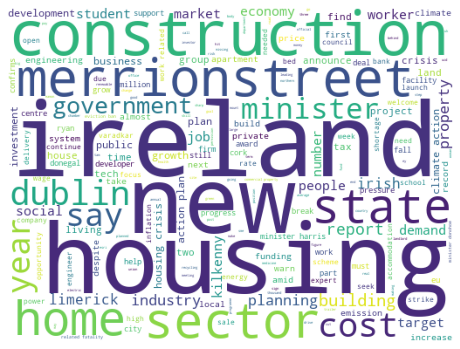

In [8]:
plt.subplots(figsize = (8,8))
wordcloud = WordCloud (
    background_color = 'white',
    width = 512,
    height = 384
        ).generate(' '.join(irelandNewsDF['cleaned_text']))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()

## UK News Dataset

In [9]:
ukNewsGroupedByMonth = ukNewsDF.groupby(["month", "sentiment_label"]).agg(
    mean_value=("sentiment", "mean"),
    count=("sentiment", "count"),
)
ukNewsGroupedByMonth.reset_index(inplace=True)
ukNewsGroupedByMonth

,month,sentiment_label,mean_value,count
0,December 2022,negative,-0.204875,80
1,December 2022,positive,0.227893,103
2,February 2023,negative,-0.260705,105
3,February 2023,positive,0.288756,78
4,January 2023,negative,-0.216211,147
5,January 2023,positive,0.249207,111
6,March 2023,negative,-0.200883,111
7,March 2023,positive,0.243721,122
8,November 2022,negative,-0.227273,110
9,November 2022,neutral,0.000000,1


In [10]:
fig = go.Figure()
fig.add_trace(go.Bar(x=months, y=ukNewsGroupedByMonth[ukNewsGroupedByMonth["sentiment_label"] == "positive"]["mean_value"], name="Positive"))
fig.add_trace(go.Bar(x=months, y=ukNewsGroupedByMonth[ukNewsGroupedByMonth["sentiment_label"] == "negative"]["mean_value"], name="Negative"))

fig.update_layout(
    width=700,
    barmode='relative', 
    title_text='Average Sentiment of the News Headlines Related to Construction in UK')
fig.show()

In [11]:
months = ["November 2022", "December 2022", "January 2023", "February 2023", "March 2023"]
fig = px.bar(ukNewsGroupedByMonth, x="month", y="count",
             color='sentiment_label', barmode='group',
             color_discrete_map={
                 "ie": "#FF883E",
                 "uk": "#00247D"
             },
             title="Number of News Headline per Sentiment in UK",
             width=700, labels={'x': 'Parameters', 'y': 'Accuracy'},
            )
fig.update_xaxes(categoryorder='array', categoryarray= months)
fig.show()

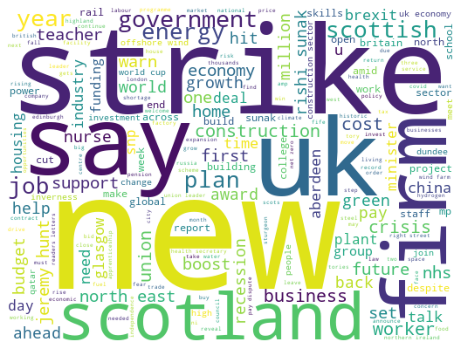

In [12]:
plt.subplots(figsize = (8,8))
wordcloud = WordCloud (
    background_color = 'white',
    width = 512,
    height = 384
        ).generate(' '.join(ukNewsDF['cleaned_text']))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()